## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/updated/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


In [5]:
data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)

(143, 4)

In [ ]:
data_traintest

In [ ]:
data_predict

In [ ]:
for stock in ['PEP','IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    data_traintest = data.drop(data.index[data.index.get_loc('2020-09'):], axis=0)
    data_predict = data.drop(data.index[:data.index.get_loc('2020-09')], axis=0)
    data_traintest.to_csv(PATH+'{}_Manual_traintest_dataset.csv'.format(stock))
    data_predict.to_csv(PATH+'{}_Manual_predict_dataset.csv'.format(stock))

## 2.1 No scaled y dataset evaluation

In [41]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='identity', solver='lbfgs', alpha=0.000041, learning_rate='constant', learning_rate_init=0.0000000000000000000000000000000000001, batch_size=1), n_jobs=-1, cv=cv,
                   param_grid={"batch_size": [1,2,3,4,5,6,7,8,9,10]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=False))

{'batch_size': 1}


In [23]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'random_state': [2021],
    'max_iter': [100000],
    'hidden_layer_sizes': [(3,3,3)], #[(3,), (3,3), (3,3,3), (2,), (2,2), (2,2,2)], #[(2,), (2,2), (2,2,2), (2,2,2,2), (2,1), (2,3), (2,4), (2,5)]
    'activation': ['relu'], #['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'], #['lbfgs', 'sgd', 'adam']
    'alpha': [0.0000431], #[0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
    'learning_rate': ['constant'], #['constant', 'invscaling', 'adaptive']
    'learning_rate_init': [0.0245], #[0.0245, 0.0246, 0.0247, 0.0248, 0.0249, 0.025, 0.0251, 0.0252, 0.0253, 0.0254, 0.0255, 0.0256, 0.0257, 0.0258, 0.0259] #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
    'batch_size': ['auto']#list(range(21,201)) #60

}
mlp = GridSearchCV(MLPRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(mlp, '{}_Manual_dataset.csv', PATH, stocks, 'mlp', scaling=False)

{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on NSC 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.1905887660997694 




/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on GL 
RMSE mean: 15.614131476889735 
 MAPE mean: 1.279546324817517 
 MAE mean: 12.488614790722387 


{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on PEP 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.1905887660997694 


{'activation': 'identity', 'alpha': 4.31e-05, 'batch_size': 'auto', 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'max_iter': 100000, 'random_state': 2021, 'solver': 'lbfgs'} GridSearch fit on BDX 
RMSE mean: 5.1049402153816645 
 MAPE mean: 0.11019202191970594 
 MAE mean: 3.

In [ ]:
#hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', alpha=0.0000435, learning_rate='invscaling', learning_rate_init=0.0246, batch_size=19
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=False)

## 3.0 Model testing settings

In [3]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_traintest_dataset.csv', PATH)
datas_pred = make_dict('{}_Manual_predict_dataset.csv', PATH)

## 3.1 MLP Testing

In [24]:
param_grid = {
    'random_state': [2021],
    'max_iter': [100000],
    'hidden_layer_sizes': [(3,3,3)], #[(3,), (3,3), (3,3,3), (2,), (2,2), (2,2,2)], #[(2,), (2,2), (2,2,2), (2,2,2,2), (2,1), (2,3), (2,4), (2,5)]
    'activation': ['relu'], #['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs'], #['lbfgs', 'sgd', 'adam']
    'alpha': [0.0000431], #[0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
    'learning_rate': ['constant'], #['constant', 'invscaling', 'adaptive']
    'learning_rate_init': [0.0245], #[0.0245, 0.0246, 0.0247, 0.0248, 0.0249, 0.025, 0.0251, 0.0252, 0.0253, 0.0254, 0.0255, 0.0256, 0.0257, 0.0258, 0.0259] #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
    'batch_size': ['auto']#list(range(21,201)) #60

}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'random_state': 2021, 'max_iter': 100000, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.31e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'batch_size': 'auto'}


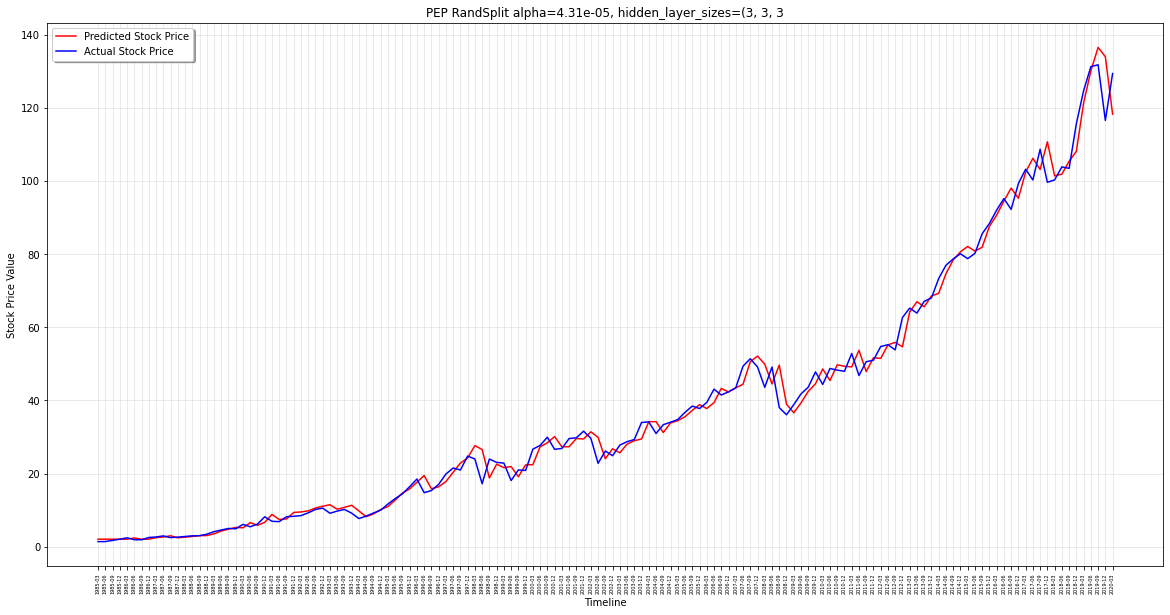

PEP MODEL RESULTS
 RMSE
 	Test: 3.5011270914381383
 MAPE
 	Test: 0.10587652317697924
 MAE
 	Test: 2.218839552525271
 R2 Score Adj
 	Test: 0.9866839224146815



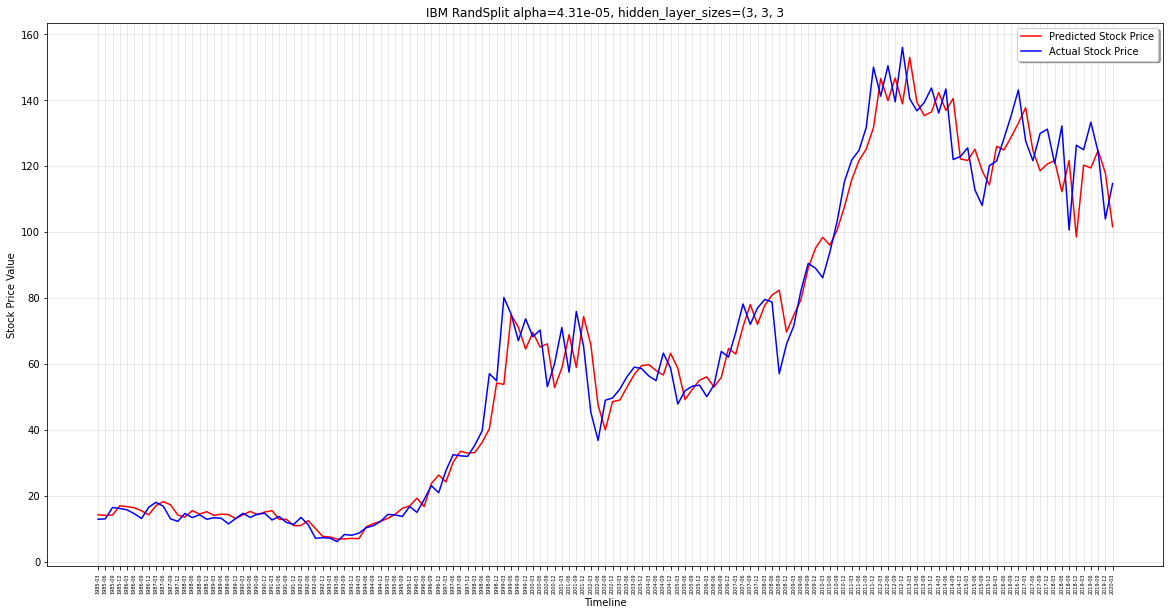

IBM MODEL RESULTS
 RMSE
 	Test: 10.22942777720277
 MAPE
 	Test: 0.12765392075989074
 MAE
 	Test: 6.843989862154934
 R2 Score Adj
 	Test: 0.9597106159720412



In [4]:
from lib.fundamental_lib import model_results_revised
#Params={'activation': 'identity', 'hidden_layer_sizes': (3,), 'solver': 'adam'}
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='identity', solver='lbfgs', alpha=0.000041, learning_rate='constant', learning_rate_init=0.0000000000000000000000000000000000001, batch_size=1)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', alpha=0.0000435, learning_rate='invscaling', learning_rate_init=0.0246, batch_size=19)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='relu', solver='lbfgs', alpha=0.0000431, learning_rate='constant', learning_rate_init=0.0245, batch_size=1) #best
Params={'random_state': 2021, 'max_iter': 100000, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.31e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'batch_size': 'auto'}
mlp = MLPRegressor(**Params)
models = dict()
for stock in ['PEP', 'IBM']:
    models[stock] = model_results_revised(datas[stock], mlp, label=stock, scaling=False, end='2020-06')


PEP
              price  daily_difference  signal  positions
2020-09  136.529419        -11.526603     0.0        NaN
2020-12  147.125229        -13.452293     0.0        0.0
2021-03  141.449997        -12.249013     0.0        0.0 

         stock
2020-09    0.0
2020-12    0.0
2021-03    0.0 

         positions   cash  total
2020-09        0.0  140.0  140.0
2020-12        0.0  140.0  140.0
2021-03        0.0  140.0  140.0 



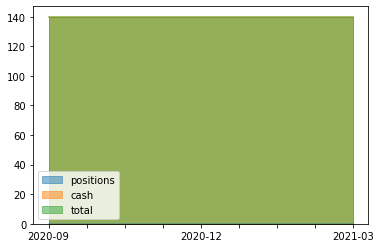


IBM
              price  daily_difference  signal  positions
2020-09  117.041725         -5.624939     0.0        NaN
2020-12  122.847458         -7.381449     0.0        0.0
2021-03  131.787506         -9.363587     0.0        0.0 

         stock
2020-09    0.0
2020-12    0.0
2021-03    0.0 

         positions   cash  total
2020-09        0.0  140.0  140.0
2020-12        0.0  140.0  140.0
2021-03        0.0  140.0  140.0 



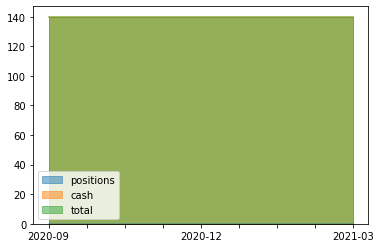

In [5]:
from lib.fundamental_lib import backtesting, generate_df
for stock in ['PEP', 'IBM']:
    print('\n'+stock)
    porto = backtesting(generate_df(datas_pred, stock, models, False), 140, verbose=True)
    #display(porto)
    porto.plot.area(stacked=False)
    plt.show()